




<a href="https://codeimmersives.com"><img src = "https://www.codeimmersives.com/wp-content/uploads/2019/09/CodeImmersives_Logo_RGB_NYC_BW.png" width = 400> </a>


<h1 align=center><font size = 5>Agenda</font></h1>

###
<div class="alert alert-block alert-info" style="margin-top: 20px">

1. Exercise - racial bias  
2. [Pie Charts]
3.  Pandas/Matplotlib Exercises in-class
4.  [Review](#12)<br>     
</div>
<hr>

<h2> Analyzing and filtering racial bias from 2015 to 2019 </h2>
1) Read in the csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Bias_crime_2015_2019.csv')

In [ ]:
df

,Race_Ethnicity,2015,2016,2017,2018,2019
0,Anti-White,613,720,741,762,666
1,Anti-Black or African American,1745,1739,2013,1943,1930
2,Anti-American Indian or Alaska Native,131,154,251,194,119
3,Anti-Asian,111,113,131,148,158
4,Anti-Native Hawaiian or Other Pacific Islander,4,9,16,20,21
5,Anti-Multiple Races- Group,113,136,180,137,134
6,Anti-Arab,37,51,102,82,95
7,Anti-Hispanic or Latino,299,344,427,485,527
8,Anti-Other Race/Ethnicity/Ancestry,257,23,270,276,313


2) Find the differences in bias from 2019 to 2015 and plot this difference using a barchart with race on the x-axis and the associated bias on the y-axis.

,Race_Ethnicity,2015,2016,2017,2018,2019,Difference_Bias_2015_2019
0,Anti-White,613,720,741,762,666,53
1,Anti-Black or African American,1745,1739,2013,1943,1930,185
2,Anti-American Indian or Alaska Native,131,154,251,194,119,-12
3,Anti-Asian,111,113,131,148,158,47
4,Anti-Native Hawaiian or Other Pacific Islander,4,9,16,20,21,17
5,Anti-Multiple Races- Group,113,136,180,137,134,21
6,Anti-Arab,37,51,102,82,95,58
7,Anti-Hispanic or Latino,299,344,427,485,527,228
8,Anti-Other Race/Ethnicity/Ancestry,257,23,270,276,313,56


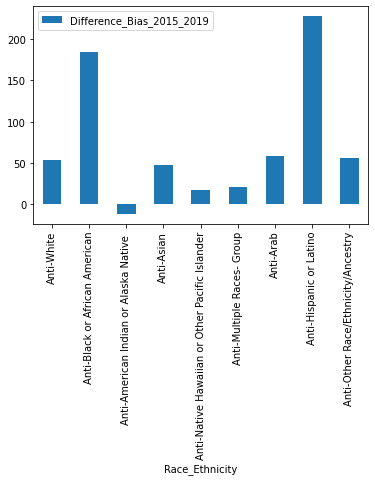

In [ ]:
df['Difference_Bias_2015_2019'] = df['2019']-df['2015']
df.plot.bar(x='Race_Ethnicity', y='Difference_Bias_2015_2019')
df

3) Get the max bias in the year 2015:

In [ ]:
df_max = df['2015'].max()
print(df_max)

1745


<h2> Pie Chart to highlight the largest groups in this dataset </h2>
ax.pie(labels, explode, figsize) <br>
We can configure explode to highlight our largest group in the pie chart.

[0, 0.05, 0, 0, 0, 0, 0, 0, 0]


<Axes: ylabel='2015'>

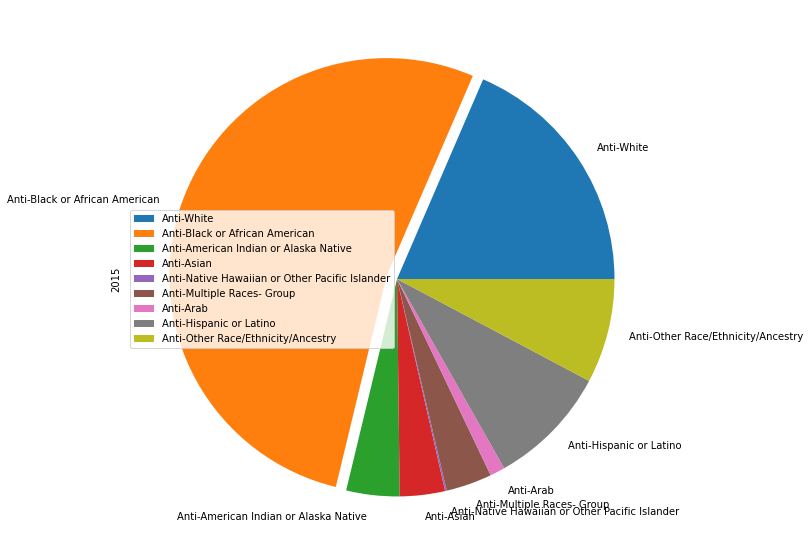

In [ ]:
eth_dict = zip(df['Race_Ethnicity'].tolist(),df['2015'].tolist())
eth_dict = dict(eth_dict)

explode = [.05 if v== df_max else 0 for k,v in eth_dict.items()] #only 'explode' the largest slide
print(explode)
pie_data = pd.DataFrame({'2015': df['2015'].tolist()}, index = df['Race_Ethnicity'])
pie_data.plot.pie(y = '2015', explode=explode, figsize = (10,10))


[613, 1745, 131, 111, 4, 113, 37, 299, 257]
[0.05, 0.05, 0, 0, 0, 0, 0, 0, 0]


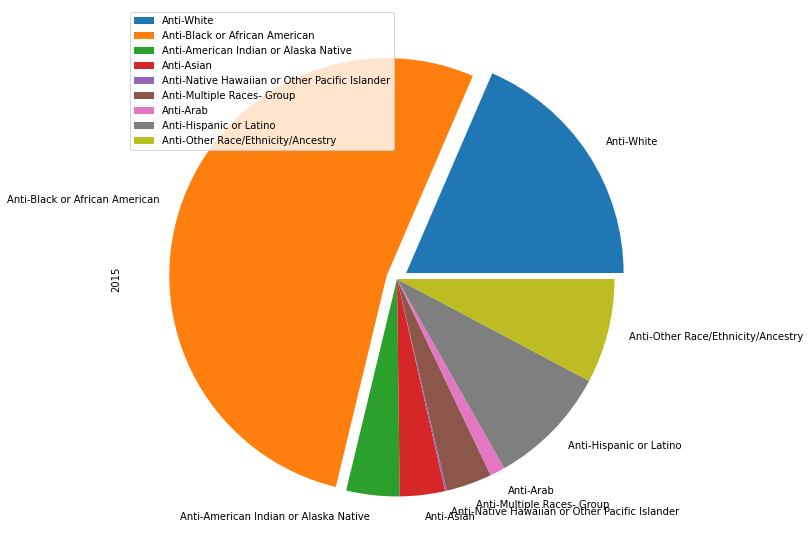

In [ ]:
# Show top 2 items
eth_dict = zip(df['Race_Ethnicity'].tolist(),df['2015'].tolist())
eth_dict = dict(eth_dict)
x = [v for k,v in eth_dict.items()]
print(x)
explode = [.05 if v> 300 else 0 for k,v in eth_dict.items()]
print(explode)
pie_data = pd.DataFrame({'2015': df['2015'].tolist()}, index = df['Race_Ethnicity'])
pie_data.plot.pie(y = '2015', explode=explode, figsize = (10,10))

4) Find the Top 3 groups in 2015 and plot a pie chart that explodes them out.

[613, 1745, 131, 111, 4, 113, 37, 299, 257]
[0.05, 0.05, 0, 0, 0, 0, 0, 0.05, 0]


<Axes: ylabel='2015'>

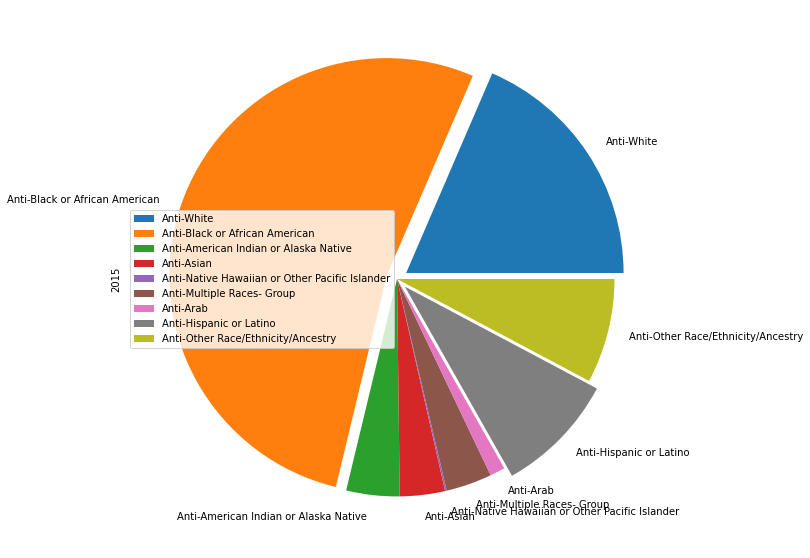

In [ ]:
eth_dict = zip(df['Race_Ethnicity'].tolist(),df['2015'].tolist())
eth_dict = dict(eth_dict)
x = [v for k,v in eth_dict.items()]
print(x)
x.sort()
top3=x[-3:]
explode = [.05 if v in top3 else 0 for k,v in eth_dict.items()]
print(explode)
pie_data = pd.DataFrame({'2015': df['2015'].tolist()}, index = df['Race_Ethnicity'])
pie_data
pie_data.plot.pie(y = '2015', explode=explode, figsize = (10,10))

## NYPD Historical Arrests EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('NYPD_Arrests_Data__Historic_.csv', low_memory=False)

In [ ]:
data.dataframeName = 'NYPD_Complaint_Data_Historic.csv'

In [ ]:
data.shape

(203243, 18)

In [ ]:
data.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638
1,173114463,12/31/2017,478,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241
2,173113513,12/31/2017,849,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572
3,173113423,12/31/2017,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074
4,173113421,12/31/2017,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811


In [ ]:
data.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,2.032430e+05,203243.000000,202678.000000,203243.000000,203243.000000,2.032430e+05,203243.000000,203243.000000,203243.000000
mean,1.682826e+08,480.997215,274.042017,61.269594,1.664840,1.004787e+06,208292.411271,40.738350,-73.925867
std,2.768804e+06,269.432254,150.278301,34.806104,10.969528,2.105161e+04,29819.780902,0.081853,0.075920
min,1.636605e+08,0.000000,101.000000,1.000000,0.000000,9.138450e+05,121131.000000,40.498905,-74.253187
25%,1.657619e+08,259.000000,121.000000,33.000000,0.000000,9.907840e+05,185838.000000,40.676647,-73.976480
50%,1.681879e+08,478.000000,341.000000,60.000000,0.000000,1.003702e+06,207735.000000,40.736865,-73.929804
75%,1.706105e+08,729.000000,347.000000,90.000000,0.000000,1.016505e+06,235308.000000,40.812520,-73.883486
max,1.731657e+08,997.000000,995.000000,123.000000,97.000000,1.067113e+06,271820.000000,40.912723,-73.700985


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203243 entries, 0 to 203242
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ARREST_KEY         203243 non-null  int64  
 1   ARREST_DATE        203243 non-null  object 
 2   PD_CD              203243 non-null  int64  
 3   PD_DESC            202678 non-null  object 
 4   KY_CD              202678 non-null  float64
 5   OFNS_DESC          202678 non-null  object 
 6   LAW_CODE           203243 non-null  object 
 7   LAW_CAT_CD         202139 non-null  object 
 8   ARREST_BORO        203243 non-null  object 
 9   ARREST_PRECINCT    203243 non-null  int64  
 10  JURISDICTION_CODE  203243 non-null  int64  
 11  AGE_GROUP          203243 non-null  object 
 12  PERP_SEX           203243 non-null  object 
 13  PERP_RACE          203243 non-null  object 
 14  X_COORD_CD         203243 non-null  float64
 15  Y_COORD_CD         203243 non-null  float64
 16  La

<h2> Exercise </h2>
1) Find the incident count of the top 10 precincts ('ARREST_PRECINCT' is the precinct ID where the incident occurred) <br>
2) Store the top 10 precincts into a new dataframe with the precinct ID as an int column and the incident count as  another int column. <br>
3) Plot the new dataframe, with the x-axis as precinct ID and the y-axis as incident/complaint count. <br>
4) Find the top 10 incident descriptions
('OFNS_DESC') by total count and print them. Store them in a separate dataframe with columns 'incident description' and 'incident count'. Plot the dataframe as you did above.




```
# This is formatted as code
```

2) Store the top 10 precincts into a new dataframe with the precinct ID as an int column and the incident count as  another int column.

3) Plot the new dataframe, with the x-axis as precinct ID and the y-axis as incident/complaint count.

> Indented block



4) Find the top 10 incident descriptions
('OFNS_DESC') by total count and print them. Store them in a separate dataframe with columns 'incident description' and 'incident count'. Plot the dataframe as you did above.

# Extra EDA

In [ ]:
data['PATROL_BORO'].value_counts()

PATROL BORO BRONX            1485161
PATROL BORO BKLYN SOUTH      1021109
PATROL BORO BKLYN NORTH      1015393
PATROL BORO MAN SOUTH         830904
PATROL BORO MAN NORTH         813409
PATROL BORO QUEENS NORTH      698941
PATROL BORO QUEENS SOUTH      655319
PATROL BORO STATEN ISLAND     321518
Name: PATROL_BORO, dtype: int64

In [ ]:
data

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638
1,173114463,12/31/2017,478,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241
2,173113513,12/31/2017,849,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572
3,173113423,12/31/2017,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074
4,173113421,12/31/2017,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203238,163682084,04/11/2017,439,"LARCENY,GRAND FROM OPEN AREAS,UNCLASSIFIED",109.0,GRAND LARCENY,PL 1553001,F,M,19,0,25-44,M,WHITE,993570.0,216847.0,40.761875,-73.966358
203239,163682099,04/11/2017,114,OBSTR BREATH/CIRCUL,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1211100,M,Q,114,2,45-64,M,BLACK,1002344.0,216933.0,40.762097,-73.934685
203240,163684051,04/11/2017,511,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,B,46,0,25-44,M,WHITE HISPANIC,1011135.0,249238.0,40.850743,-73.902822
203241,163698643,04/11/2017,782,"WEAPONS, POSSESSION, ETC",236.0,DANGEROUS WEAPONS,PL 2650101,M,K,61,0,25-44,M,WHITE,997149.0,157565.0,40.599155,-73.953552


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(data['AGE_GROUP'].value_counts())

25-44    102040
18-24     49288
45-64     38365
<18       11359
65+        2191
Name: AGE_GROUP, dtype: int64


In [ ]:
data['AGE_GROUP'].unique()

array(['25-44', '18-24', '45-64', '65+', '<18'], dtype=object)

In [ ]:
# need to clean up some of this data

data = data.groupby('AGE_GROUP').filter(lambda x: len(x)>10)
data['AGE_GROUP'].unique()

array(['25-44', '18-24', '45-64', '65+', '<18'], dtype=object)

In [ ]:
ages = data['AGE_GROUP'].value_counts()

age_counts = pd.DataFrame({'Age_Group':ages.index, 'COMPLAINT_COUNT':ages.values})

age_counts

,Age_Group,COMPLAINT_COUNT
0,25-44,102040
1,18-24,49288
2,45-64,38365
3,<18,11359
4,65+,2191


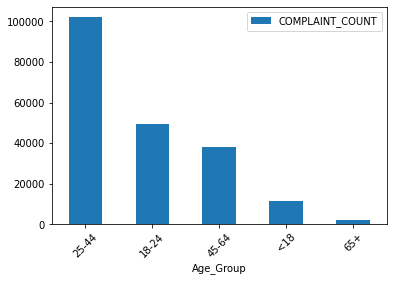

In [ ]:
ax = age_counts.plot.bar(x='Age_Group', y='COMPLAINT_COUNT', rot=45)

In [ ]:
data['PERP_RACE'].value_counts()

BLACK                             97063
WHITE HISPANIC                    50961
WHITE                             24811
BLACK HISPANIC                    17752
ASIAN / PACIFIC ISLANDER          10364
UNKNOWN                            1765
AMERICAN INDIAN/ALASKAN NATIVE      527
Name: PERP_RACE, dtype: int64

In [ ]:
races = data['PERP_RACE'].value_counts()

race_counts = pd.DataFrame({'Susp_Race':races.index, 'COMPLAINT_COUNT':races.values})

race_counts

,Susp_Race,COMPLAINT_COUNT
0,BLACK,97063
1,WHITE HISPANIC,50961
2,WHITE,24811
3,BLACK HISPANIC,17752
4,ASIAN / PACIFIC ISLANDER,10364
5,UNKNOWN,1765
6,AMERICAN INDIAN/ALASKAN NATIVE,527


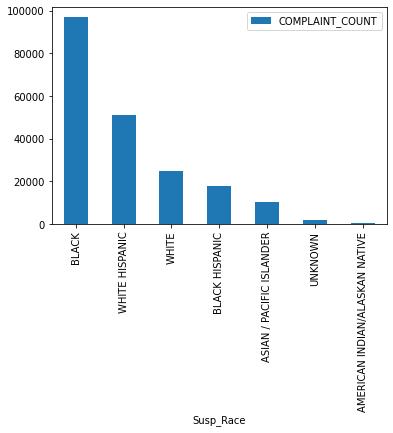

In [ ]:
ax = race_counts.plot.bar(x='Susp_Race', y='COMPLAINT_COUNT', rot=90)

In [ ]:
data['SUSP_SEX'].value_counts()

M    2156729
F     691591
U     561763
Name: SUSP_SEX, dtype: int64

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

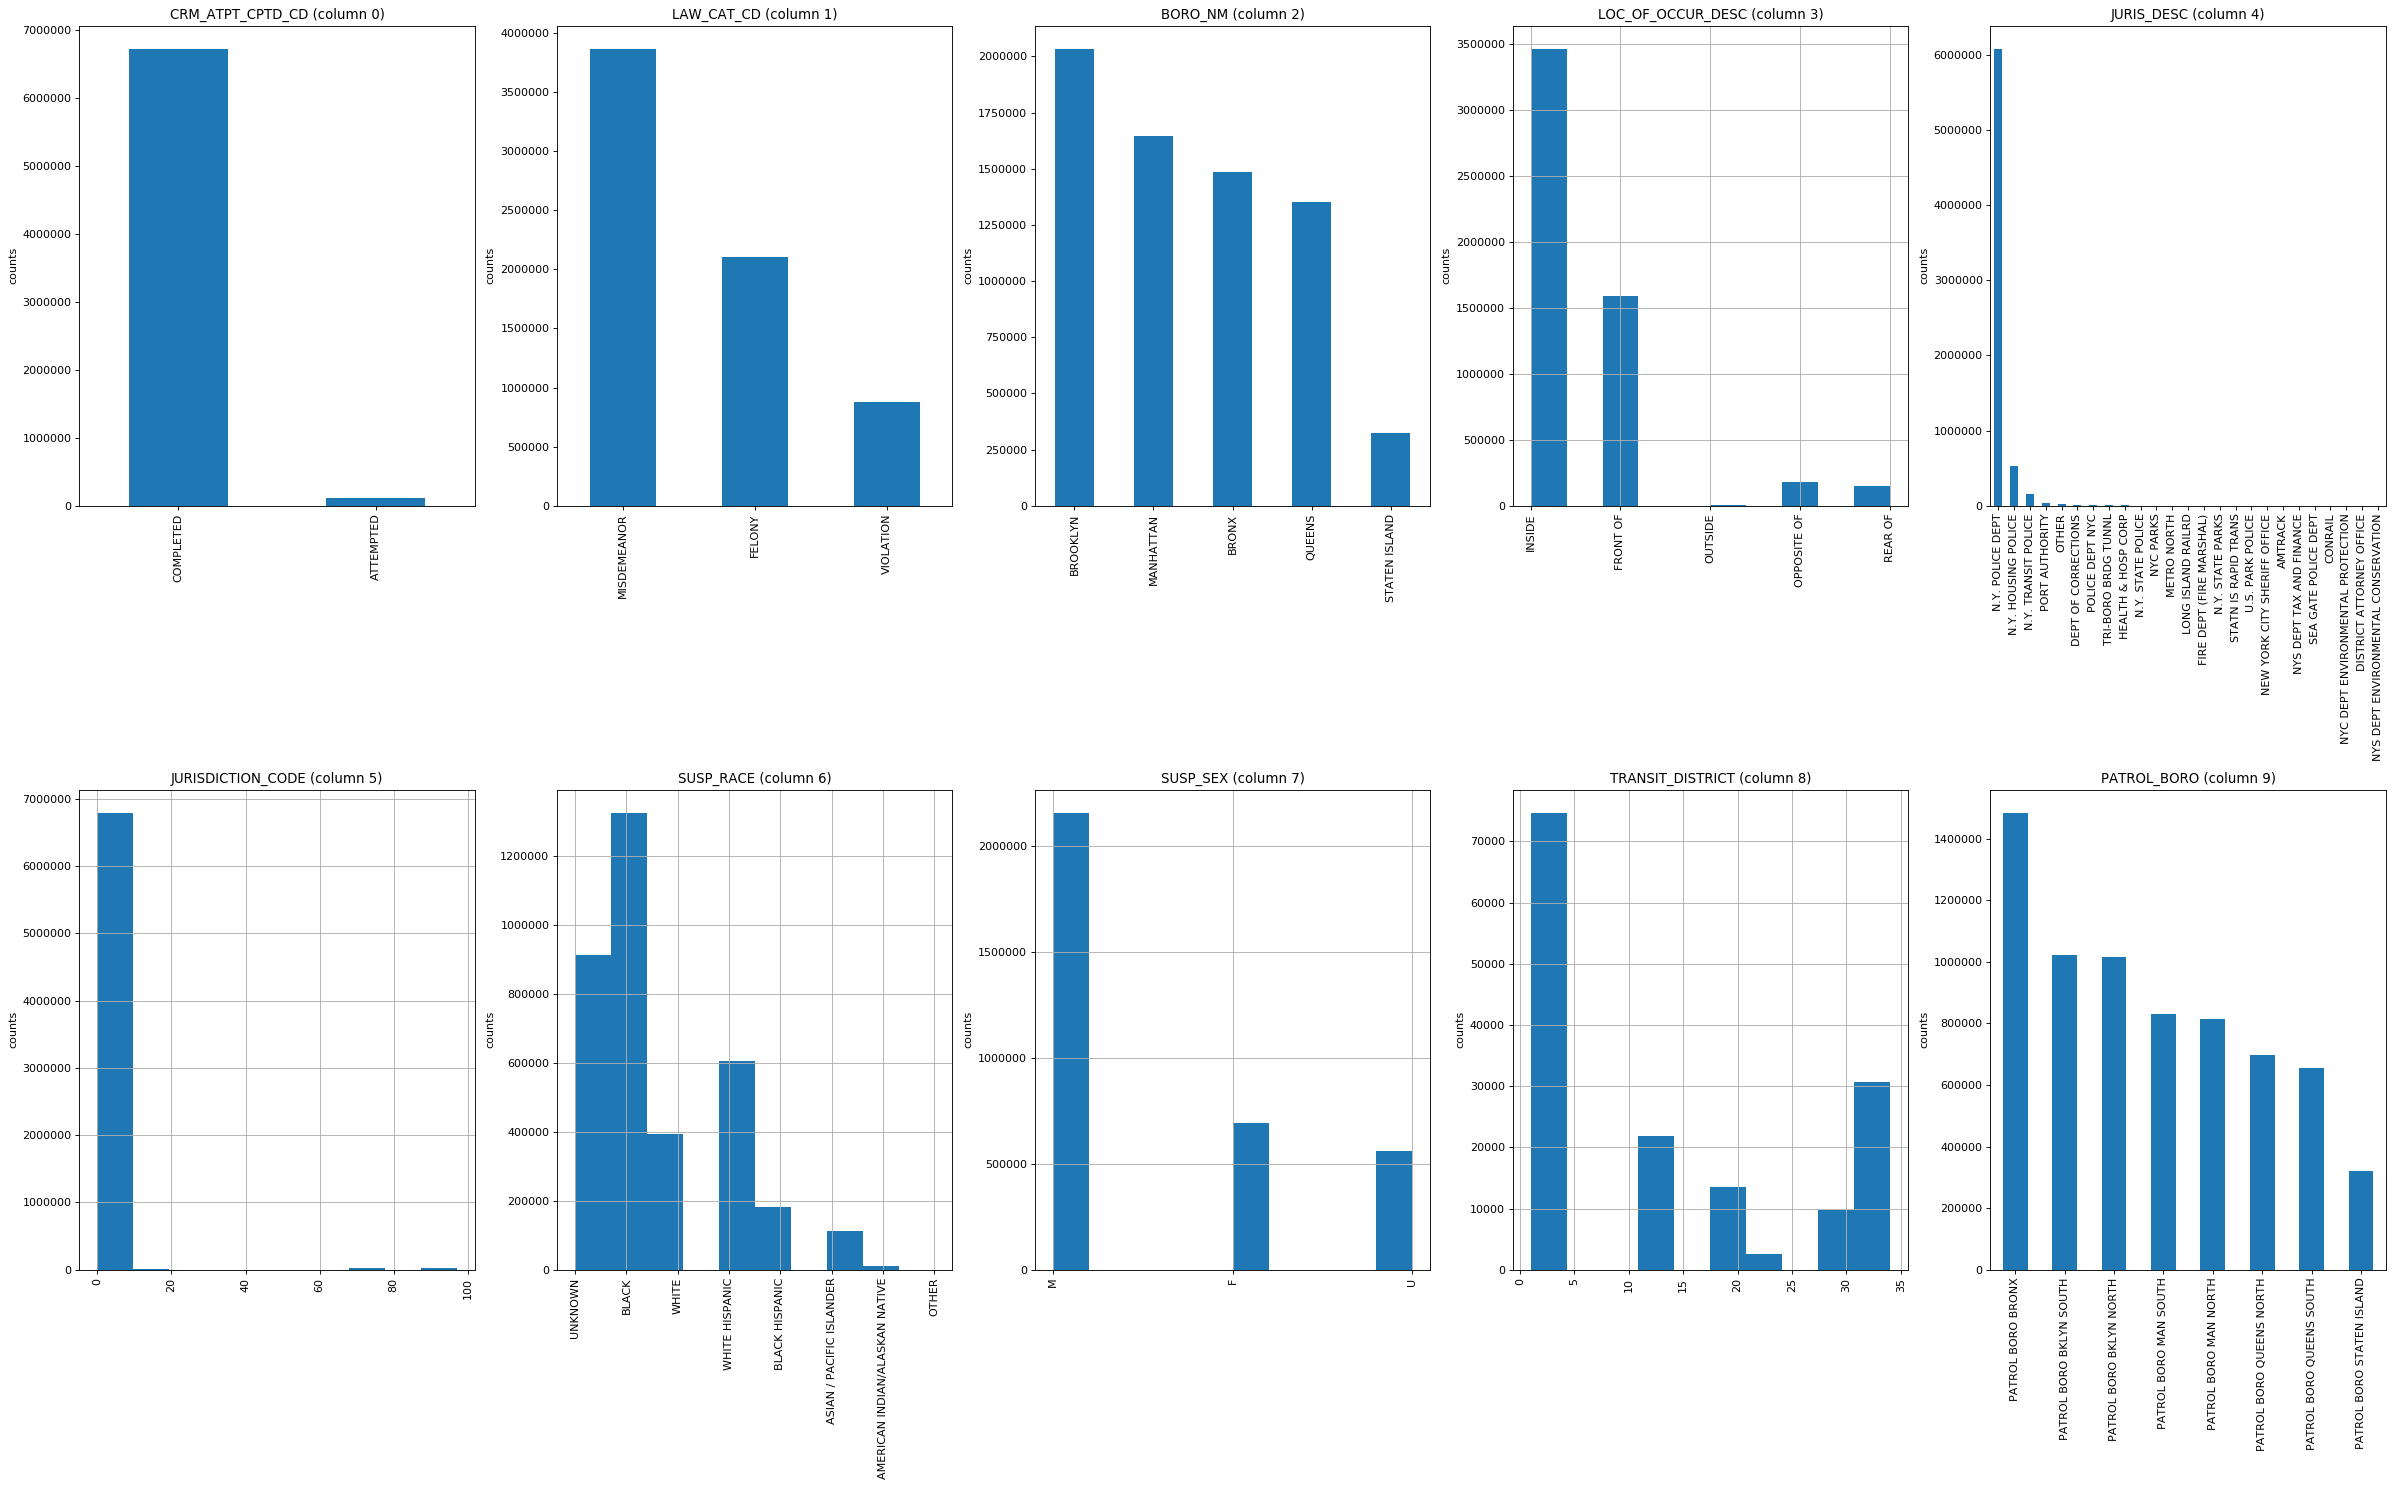

In [ ]:
plotPerColumnDistribution(data, 10, 5)

In [ ]:
data.isnull().sum().sum()

52644916

In [ ]:
data['e'] = 1
data.sample()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,e
5297663,454462230,02/12/2017,18:50:00,02/12/2017,20:51:00,52.0,02/14/2017,114,ARSON,263.0,...,NaN,40.884444,-73.878781,"(40.884444399, -73.878781355)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E,1


In [ ]:
boro_crime = data.groupby(['BORO_NM']).count()['e']
boro_crime

BORO_NM
BRONX            1484373
BROOKLYN         2035004
MANHATTAN        1645015
QUEENS           1351400
STATEN ISLAND     321394
Name: e, dtype: int64

In [ ]:
#boroDF = boro_crime.to_frame(index=False)

boroDF = pd.DataFrame({'BORO_NAME':boro_crime.index, 'COMPLAINT_COUNT':boro_crime.values})

In [ ]:
boroDF

,BORO_NAME,COMPLAINT_COUNT
0,BRONX,1484373
1,BROOKLYN,2035004
2,MANHATTAN,1645015
3,QUEENS,1351400
4,STATEN ISLAND,321394


In [ ]:
boroDF.columns

Index(['BORO_NAME', 'COMPLAINT_COUNT'], dtype='object')

In [ ]:
boroDF_prop = boroDF.assign(PERCENTAGE = boroDF.COMPLAINT_COUNT / sum(boroDF.COMPLAINT_COUNT))

boroDF_prop['Percentage'] = boroDF['Complaint_Count'] / sum(boroDF.COMPLAINT_COUNT)

In [ ]:
boroDF

,BORO_NAME,COMPLAINT_COUNT
0,BRONX,1484373
1,BROOKLYN,2035004
2,MANHATTAN,1645015
3,QUEENS,1351400
4,STATEN ISLAND,321394


In [ ]:
boroDF_prop

,BORO_NAME,COMPLAINT_COUNT,PERCENTAGE
0,BRONX,1484373,0.217103
1,BROOKLYN,2035004,0.297638
2,MANHATTAN,1645015,0.240598
3,QUEENS,1351400,0.197654
4,STATEN ISLAND,321394,0.047007


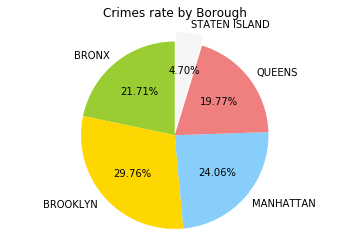

In [ ]:
# Use the proportion of crime rate in each area to make a pie chart
x = boroDF_prop['BORO_NAME']
y = boroDF_prop['PERCENTAGE']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'whitesmoke']

plt.pie(boroDF_prop['PERCENTAGE'], labels=boroDF_prop['BORO_NAME'], colors=colors,
        startangle=90,
        explode = (0, 0, 0,0 ,0.1),
        autopct = '%1.2f%%')
plt.axis('equal')
plt.title('Crimes rate by Borough')
plt.show()